In [1]:
import tweepy
import pandas as pd
import re
import emoji
import nltk
from nltk.corpus import stopwords
import praw
import pandas as pd
import time

In [2]:
import torch

In [3]:
reddit_df = pd.read_csv("reddit_exp.csv")

In [4]:
import Preprocessing

In [5]:
    reddit_df["Title"] = reddit_df["Title"].astype(str)
    reddit_df["Content"] = reddit_df["Content"].astype(str)

In [6]:
a = Preprocessing.preprocess_data(reddit_df)

In [7]:
a

,ID,Timestamp,Upvotes,Comments,URL,Cleaned_Title,Cleaned_Content,Combined_Text
0,1j80hvh,1.741619e+09,2,8,/r/depression/comments/1j80hvh/acceptance_stage/,acceptance stage,ive struggled depression since mids im rare go...,acceptance stage ive struggled depression sinc...
1,1j7uydu,1.741600e+09,1,0,/r/depression/comments/1j7uydu/failing_backwar...,failing backwards struggle depression loss sur...,years old past three months ive woken every mo...,failing backwards struggle depression loss sur...
2,1j801iz,1.741617e+09,2,8,/r/depression/comments/1j801iz/how_to_overcome...,overcome depression,im tired hopeless sad diagnosed depression sti...,overcome depression im tired hopeless sad diag...
3,1j7zrlo,1.741617e+09,2,0,/r/depression/comments/1j7zrlo/keep_getting_mo...,keep getting depressed need encouragement please,hey thanks reading needed somewhere vent moved...,keep getting depressed need encouragement plea...
4,1j7zh7l,1.741616e+09,1,0,/r/depression/comments/1j7zh7l/numb/,numb,feel numb time feel sad friends dont ever talk...,numb feel numb time feel sad friends dont ever...
...,...,...,...,...,...,...,...,...
1844,1j58l3b,1.741302e+09,1,2,/r/SuicideWatch/comments/1j58l3b/i_lost_myself/,lost,boyfriend loves whole heart im suicial make th...,lost boyfriend loves whole heart im suicial ma...
1845,1j583a7,1.741300e+09,2,1,/r/SuicideWatch/comments/1j583a7/melodramatic_...,melodramatic thoughts alternate realities,one favorite movies everything everywhere real...,melodramatic thoughts alternate realities one ...
1846,1j57w3j,1.741300e+09,3,2,/r/SuicideWatch/comments/1j57w3j/im_a_horrible...,im horrible person deserve die,im f im starting realize big problem im bitch ...,im horrible person deserve die im f im startin...
1847,1j57svs,1.741299e+09,2,2,/r/SuicideWatch/comments/1j57svs/i_feel_trapped/,feel trapped,dont know else go ive burnt online friends men...,feel trapped dont know else go ive burnt onlin...


In [8]:
import classify_post

C:\Users\Dines\anaconda3\envs\new_env_name\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [9]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dines\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

C:\Users\Dines\Ai crisis detection\classify_post.py:84: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=posts_df, x='Sentiment', palette="Set2")


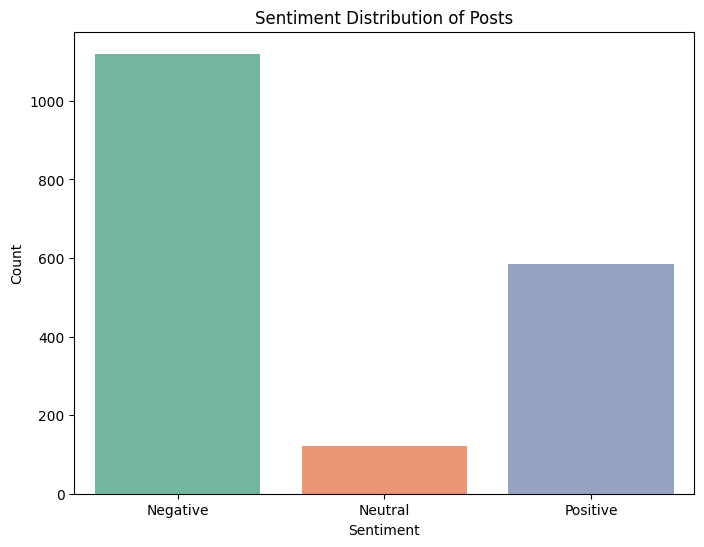

C:\Users\Dines\Ai crisis detection\classify_post.py:92: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=posts_df, x='Risk_Level', palette="coolwarm")


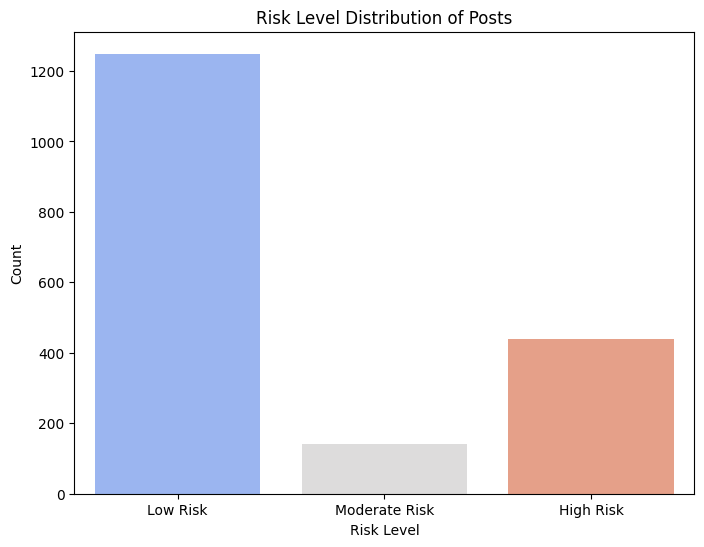

In [10]:
new_df= classify_post.process_and_visualize(a)

In [11]:
new_df.to_csv("classified_risk_levels.csv", index=False)

In [13]:
import importlib
import crisis_geolocation

importlib.reload(crisis_geolocation)  # Force reload


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dines\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Dines\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


<module 'crisis_geolocation' from 'C:\\Users\\Dines\\Ai crisis detection\\crisis_geolocation.py'>

In [14]:
from crisis_geolocation import generate_crisis_heatmap

crisis_geolocation.generate_crisis_heatmap(new_df)

**Top 5 Crisis Locations:**
 South Carolina, United States: 3 mentions
 United States: 3 mentions
 Phobia, 127, Rue Jeanne d'Arc, Quartier de la Salpêtrière, Paris 13e Arrondissement, Paris, France métropolitaine, 75013, France: 2 mentions
 Alabama, United States: 1 mentions
 Texas, United States: 1 mentions
Heatmap saved as crisis_heatmap.html
